In [105]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

In [106]:
df = pd.read_csv("sample.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


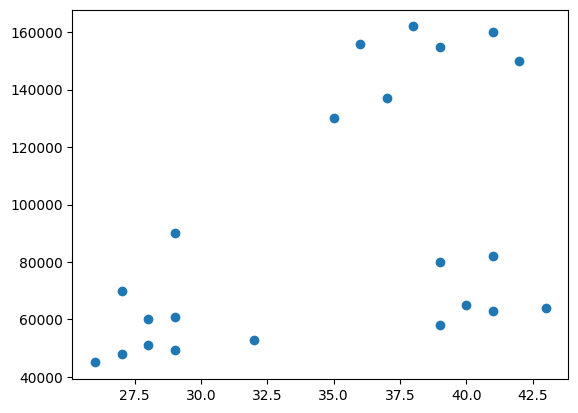

In [107]:
plt.scatter(df.Age , df["Income($)"])

In [108]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age" , "Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [109]:
df["cluster"] = y_predicted
df 

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


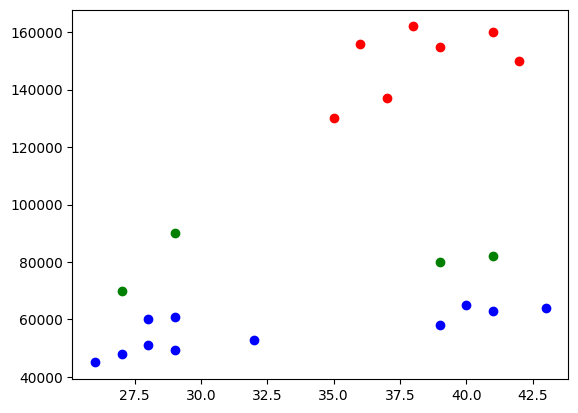

In [110]:
df1 = df[df["cluster"].values == 0]
df2 = df[df["cluster"].values == 1]
df3 = df[df["cluster"].values == 2]

plt.scatter(df1.Age , df1["Income($)"] , color="green")
plt.scatter(df2.Age , df2["Income($)"] , color="red")
plt.scatter(df3.Age , df3["Income($)"] , color="blue")

In [111]:
# Output is too uneven so lets apply minmax 
scler = MinMaxScaler()
df["Age"] = scler.fit_transform(df[["Age"]])
df["Income($)"] = scler.fit_transform(df[["Income($)"]])

In [115]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age" , "Income($)"]])
df["cluster"] = y_predicted

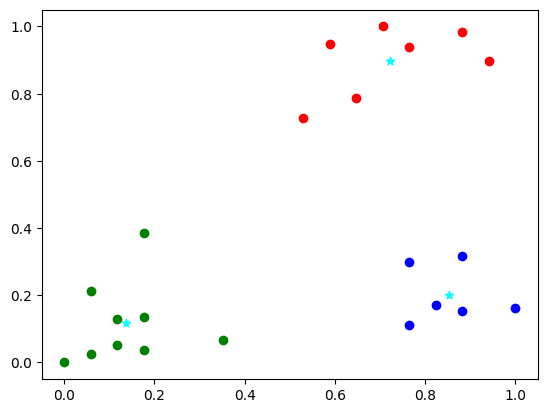

In [117]:
df1 = df[df["cluster"].values == 0]
df2 = df[df["cluster"].values == 1]
df3 = df[df["cluster"].values == 2]

plt.scatter(df1.Age , df1["Income($)"] , color="green")
plt.scatter(df2.Age , df2["Income($)"] , color="red")
plt.scatter(df3.Age , df3["Income($)"] , color="blue")

plt.scatter(km.cluster_centers_[ : , 0], km.cluster_centers_[ : , 1], marker = "*" , color="cyan")

In [119]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age' , "Income($)"]])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared error')

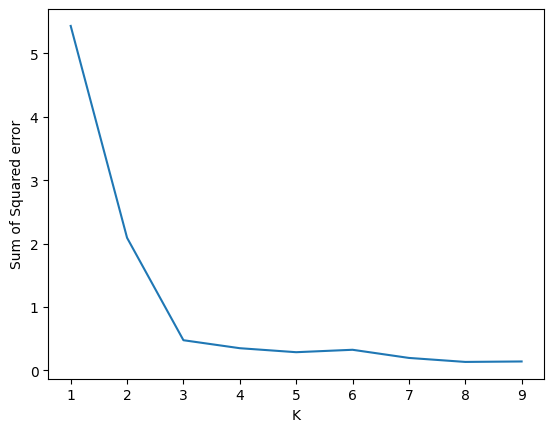

In [122]:
plt.plot( k_range, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared error')